In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math
from matplotlib.ticker import ScalarFormatter

In [31]:
muons=uproot.open("muonid_single.root")

In [3]:
def treex(N):
    index='tree'+ str(N)
    return muons[index]

In [19]:
muons.keys()

['tree90;1',
 'tree91;1',
 'tree92;1',
 'tree93;1',
 'tree94;1',
 'tree95;1',
 'tree96;1',
 'tree97;1',
 'tree98;1',
 'tree99;1',
 'tree100;1',
 'tree101;1',
 'tree102;1',
 'tree103;1',
 'tree104;1',
 'tree105;1',
 'tree106;1',
 'tree107;1',
 'tree108;1',
 'tree109;1',
 'tree110;1',
 'tree111;1',
 'tree112;1',
 'tree113;1',
 'tree114;1',
 'tree115;1',
 'tree116;1',
 'tree117;1',
 'tree118;1']

In [20]:
muons["tree100"].members

{'fEntries': 81,
 'fTotBytes': 2769,
 'fZipBytes': 662,
 'fSavedBytes': 0,
 'fFlushedBytes': 0,
 'fWeight': 1.0,
 'fTimerInterval': 0,
 'fScanField': 25,
 'fUpdate': 0,
 'fDefaultEntryOffsetLen': 1000,
 'fNClusterRange': 0,
 'fMaxEntries': 1000000000000,
 'fMaxEntryLoop': 1000000000000,
 'fMaxVirtualSize': 0,
 'fAutoSave': -300000000,
 'fAutoFlush': -30000000,
 'fEstimate': 1000000,
 'fClusterRangeEnd': array([], dtype=int64),
 'fClusterSize': array([], dtype=int64),
 'fBranches': <TObjArray of 7 items at 0x0202cd252308>,
 'fLeaves': <TObjArray of 7 items at 0x0202cbb8cc88>,
 'fAliases': None}

In [21]:
muons["tree90"].typenames

<bound method HasBranches.typenames of <TTree 'tree90' (7 branches) at 0x0202cb6f73c8>>

In [22]:
muons["tree90"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
x                    | float                    | AsDtype('>f4')
y                    | float                    | AsDtype('>f4')
z                    | float                    | AsDtype('>f4')
iz                   | int32_t                  | AsDtype('>i4')
tx                   | float                    | AsDtype('>f4')
ty                   | float                    | AsDtype('>f4')
id                   | int32_t                  | AsDtype('>i4')


In [36]:
np.float64(muons["tree110"]["x"].array())

array([0.])

In [26]:
z=np.array([]) ## z position of single muon data for each layer 
x=np.array([]) 
y=np.array([])
for i in range(90,119):
    x=np.concatenate((x, np.float64(treex(i)["x"].array())), axis=None) # take the z coordinate in this layer
    y=np.concatenate((y, np.float64(treex(i)["y"].array())), axis=None)
    z=np.concatenate((z, np.float64(treex(i)["z"].array())), axis=None)
x=np.array(x)
y=np.array(y)
z=np.array(z)

No handles with labels found to put in legend.


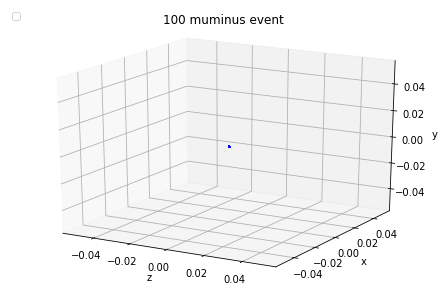

In [32]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(z,x,y,s=1,color='blue')
ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.view_init(elev=20)
plt.legend(loc='upper left')
plt.title('100 muminus event')
plt.show()